READ ME

Group Members:Ryan McDonald, Justin Drouin

This project uses the California Housing dataset from the sklearn.datasets modules to experiment and try to predict median values of homes. The project loads and stores the data as a pandas dataframe and uses that format to make various linear models use sci-kit learn.

**Experiments**


**1) Load the California Housing dataset as a Pandas DataFrame and examine its features, target values, and description.**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.linear_model
import pandas as pd
from sklearn.datasets import california_housing

data = california_housing.fetch_california_housing(as_frame=True)
description = data.DESCR
print(description)
df = data.frame
df

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


**2) Use sklearn.model_selection.train_test_split() to split the features and target values into separate training and test sets. Use 80% of the original data as a training set, and 20% for testing. To make sure that your results are reproducible, pass random_state=(2021-3-25).**

In [2]:
features = df.loc[:, df.columns != 'MedHouseVal']
target = df['MedHouseVal']

features_train, features_test, target_train, target_test = sklearn.model_selection.train_test_split(
    features, target, test_size=0.2, random_state=(2021-3-25))

**3) Recall that when we originally discussed housing prices, we suggested that the price of a house might depend on how many bedrooms it has. Create and fit() an sklearn.linear_model.LinearRegression model using AveBedrms as a predictor of MedHouseVal.**

**Use the predict() method of the model to find the response for each value in the test set, and sklearn.metrics.mean_squared_error(), to find the training and test MSE.**

In [3]:
avebedrms_model = sklearn.linear_model.LinearRegression().fit(features_train['AveBedrms'].values.reshape(-1,1), target_train)
mse_train_bedrms = sklearn.metrics.mean_squared_error(target_train, avebedrms_model.predict(features_train['AveBedrms'].values.reshape(-1,1)))
mse_test_bedrms = sklearn.metrics.mean_squared_error(target_test, avebedrms_model.predict(features_test['AveBedrms'].values.reshape(-1,1)))

print("MSE AveBedrms Training Set:", mse_train_bedrms)
print("MSE AveBedrms Testing Set:", mse_test_bedrms)

MSE AveBedrms Training Set: 1.3278477256171917
MSE AveBedrms Testing Set: 1.3323730132311569


**4) By itself, the MSE doesn’t tell us much. Use the score() method of the model to find the R2 values for the training and test sets.**

**R2, the coefficient of determination, measures the proportion of variability in the target t that can be explained using the features in X. A value near 1 indicates that most of the variability in the response has been explained by the regression, while a value near 0 indicates that the regression does not explain much of the variability. See Section 3.1.3 of An Introduction to Statistical Learning for details.**

**Given the R2 scores, how well did our model do?**

In [4]:
avebedrms_train_r2 = avebedrms_model.score(features_train['AveBedrms'].values.reshape(-1,1), target_train)
avebedrms_test_r2 =avebedrms_model.score(features_test['AveBedrms'].values.reshape(-1,1), target_test)

print("R2 Score AveBedrms Training Set:", avebedrms_train_r2)
print("R2 Score AveBedrms Testing Set:", avebedrms_test_r2)

R2 Score AveBedrms Training Set: 0.0028776656256584987
R2 Score AveBedrms Testing Set: -0.0010086368172135263


The R2 score value of our training set is very close to 0 which indicates that the model does not have much correlation and did not do very well. Our R2 score value of the testing set is below 0 which indicates that the chose model does not follow the trend of the data, so fits worse than a horizontal line.

**5)Let’s take a closer look at the data. Use pandas.plotting.scatter_matrix() to plot each pair of features. Note that you will probably want to use the optional figsize parameter to enlarge the plot. Examine the row (or column) for MedHouseVal to see how it varies with each of the other features.**

[[<AxesSubplot:xlabel='MedInc', ylabel='MedInc'>
  <AxesSubplot:xlabel='HouseAge', ylabel='MedInc'>
  <AxesSubplot:xlabel='AveRooms', ylabel='MedInc'>
  <AxesSubplot:xlabel='AveBedrms', ylabel='MedInc'>
  <AxesSubplot:xlabel='Population', ylabel='MedInc'>
  <AxesSubplot:xlabel='AveOccup', ylabel='MedInc'>
  <AxesSubplot:xlabel='Latitude', ylabel='MedInc'>
  <AxesSubplot:xlabel='Longitude', ylabel='MedInc'>
  <AxesSubplot:xlabel='MedHouseVal', ylabel='MedInc'>]
 [<AxesSubplot:xlabel='MedInc', ylabel='HouseAge'>
  <AxesSubplot:xlabel='HouseAge', ylabel='HouseAge'>
  <AxesSubplot:xlabel='AveRooms', ylabel='HouseAge'>
  <AxesSubplot:xlabel='AveBedrms', ylabel='HouseAge'>
  <AxesSubplot:xlabel='Population', ylabel='HouseAge'>
  <AxesSubplot:xlabel='AveOccup', ylabel='HouseAge'>
  <AxesSubplot:xlabel='Latitude', ylabel='HouseAge'>
  <AxesSubplot:xlabel='Longitude', ylabel='HouseAge'>
  <AxesSubplot:xlabel='MedHouseVal', ylabel='HouseAge'>]
 [<AxesSubplot:xlabel='MedInc', ylabel='AveRooms'>
 

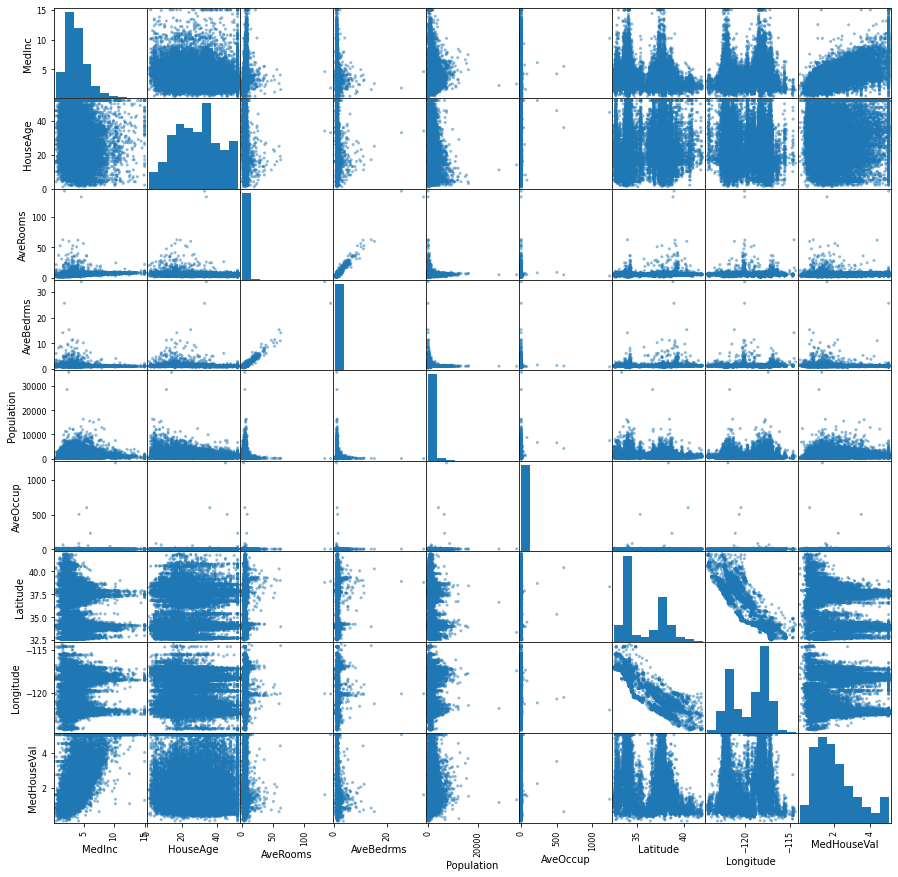

In [5]:
print(pd.plotting.scatter_matrix(df, figsize=(15,15)))

MedHouseVal when compared with the variables: Mednc, HouseAge, Latitude, and Longitude appear to have a large amount of variation while with the variables: AveRooms, AveBedrms, Population, and AveOccup there is not a lot of variation. This could be why our model with solely MedHouseVal and AveBedrms does not have much correlation. 

**6) The graphs are rather crowded because of the size of the dataset. Try the plot again using a sample() of 1%. How does the AveBedrms feature appear to affect MedHouseVal? How does this explain the value of R2 you found in experiment (4)?**

[[<AxesSubplot:xlabel='MedInc', ylabel='MedInc'>
  <AxesSubplot:xlabel='HouseAge', ylabel='MedInc'>
  <AxesSubplot:xlabel='AveRooms', ylabel='MedInc'>
  <AxesSubplot:xlabel='AveBedrms', ylabel='MedInc'>
  <AxesSubplot:xlabel='Population', ylabel='MedInc'>
  <AxesSubplot:xlabel='AveOccup', ylabel='MedInc'>
  <AxesSubplot:xlabel='Latitude', ylabel='MedInc'>
  <AxesSubplot:xlabel='Longitude', ylabel='MedInc'>
  <AxesSubplot:xlabel='MedHouseVal', ylabel='MedInc'>]
 [<AxesSubplot:xlabel='MedInc', ylabel='HouseAge'>
  <AxesSubplot:xlabel='HouseAge', ylabel='HouseAge'>
  <AxesSubplot:xlabel='AveRooms', ylabel='HouseAge'>
  <AxesSubplot:xlabel='AveBedrms', ylabel='HouseAge'>
  <AxesSubplot:xlabel='Population', ylabel='HouseAge'>
  <AxesSubplot:xlabel='AveOccup', ylabel='HouseAge'>
  <AxesSubplot:xlabel='Latitude', ylabel='HouseAge'>
  <AxesSubplot:xlabel='Longitude', ylabel='HouseAge'>
  <AxesSubplot:xlabel='MedHouseVal', ylabel='HouseAge'>]
 [<AxesSubplot:xlabel='MedInc', ylabel='AveRooms'>
 

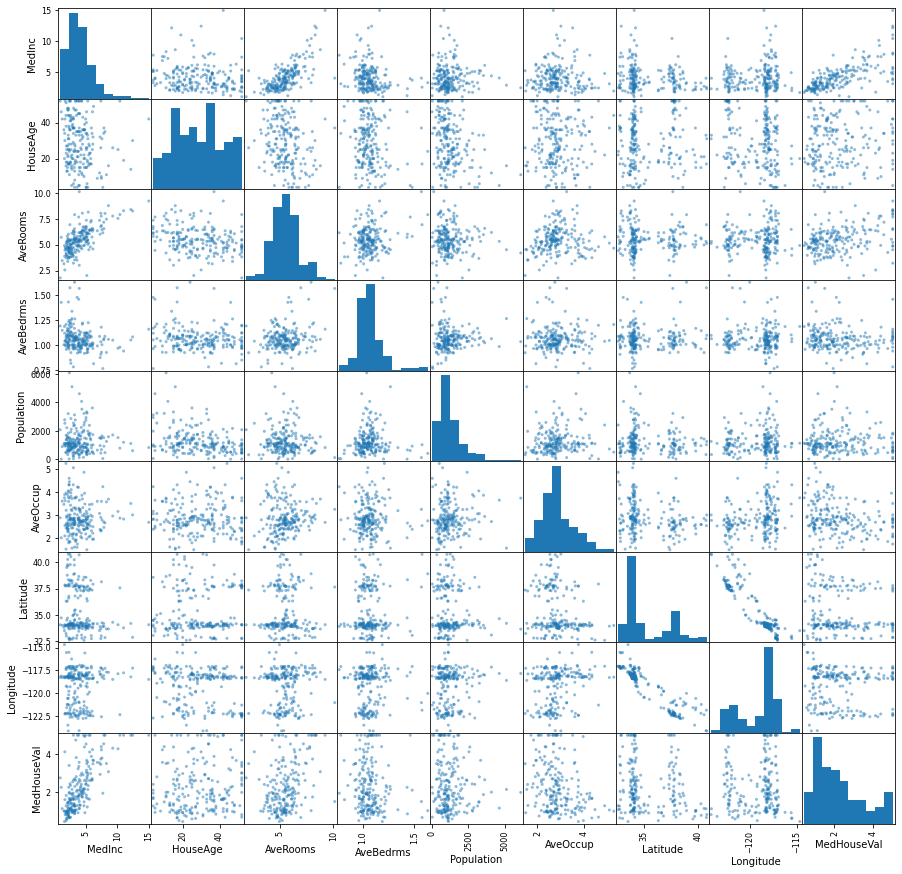

In [6]:
print(pd.plotting.scatter_matrix(df.sample(frac=0.01), figsize=(15,15)))

It appears that the AveBedrms does not seem to have an affect on the MedHouseVal. The fact that AveBedrms does not seem to have an affect explains why our R2 score values found in experiment 4 were so close to 0 or even negative for the testing set.

**7) Which features seem to have the strongest linear relationship with MedHouseVal?**

It appears that MedInc has the strongest linear relationship with the MedHouseVal.

**8) What relationship do you see between MedHouseVal and the Latitude and Longitude features? Look these values up on a map of the state and explain what you see.**

The values that appear to have a higher MedHouseVal correlate with a lattitude and longitude close to major cities, like san franciso, san diego and los angeles.

**9) Covariance is difficult to interpret because the various features are on very different scales. While you could standardize the features yourself, the correlation matrix is the covariance matrix of the standardized variables. Based on the correlation matrix, which feature is the strongest predictor of MedHouseVal? Does this match your answer in experiment (7)?**

In [7]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Based on the correlation matrix, MedInc has the largest value in the MedHouseVal column and thus these two values vary together the most. This information reinforces our answer from experiment 7.

**10) Repeat experiment (4) using the feature you found in the last experiment instead of AveBedrms. How well does this model score?**

In [8]:
medinc_model  = sklearn.linear_model.LinearRegression().fit(features_train['MedInc'].values.reshape(-1,1), target_train)

mse_train_medinc = sklearn.metrics.mean_squared_error(target_train, medinc_model.predict(features_train['MedInc'].values.reshape(-1,1)))
mse_test_medinc = sklearn.metrics.mean_squared_error(target_test, medinc_model.predict(features_test['MedInc'].values.reshape(-1,1)))

print("MSE MedInc Training Set:", mse_train_medinc)
print("MSE MedInc Testing Set:", mse_test_medinc,"\n")

medinc_train_r2 = medinc_model.score(features_train['MedInc'].values.reshape(-1,1), target_train)
medinc_test_r2 = medinc_model.score(features_test['MedInc'].values.reshape(-1,1), target_test)

print("R2 Score MedInc Training Set:", medinc_train_r2)
print("R2 Score MedInc Testing Set:", medinc_test_r2)

MSE MedInc Training Set: 0.7083924846855346
MSE MedInc Testing Set: 0.67220120164671 

R2 Score MedInc Training Set: 0.468045955604915
R2 Score MedInc Testing Set: 0.49497685569639605


Our R2 score for MedInc is much closer to 1 than that of the AveBedrms model. This shows that there is more correlation between the MedInc and our MedHouseVal.

**11) Repeat experiment (10) using all 8 input features. How do the training and test MSEs for this model compare to that experiment?**

In [9]:
full_model = sklearn.linear_model.LinearRegression().fit(features_train, target_train)

mse_train_fullmodel = sklearn.metrics.mean_squared_error(target_train,  full_model.predict(features_train))
mse_test_fullmodel = sklearn.metrics.mean_squared_error(target_test, full_model.predict(features_test))

print("MSE Full Model Training Set:", mse_train_fullmodel)
print("MSE Full Model Testing Set:", mse_test_fullmodel,"\n")

fullmodel_train_r2 = full_model.score(features_train, target_train)
fullmodel_test_r2 = full_model.score(features_test, target_test)

print("R2 Score Full Model Training Set:", fullmodel_train_r2)
print("R2 Score Full Model Testing Set:", fullmodel_test_r2)

MSE Full Model Training Set: 0.5296444457890024
MSE Full Model Testing Set: 0.5047767239631307 

R2 Score Full Model Training Set: 0.6022734414610222
R2 Score Full Model Testing Set: 0.6207624626635027


The R2 Scores have increased when using all 8 input features. This training and test MSEs have also decreased which shows that our model more accurately fits the data and creates a better linear model for prediction.

**12) Scikit-learn is capable of constructing polynomial features for us using sklearn.preprocessing.PolynomialFeatures. Use the fit_transform() method to create degree-2 polynomial and interaction terms for the entire set of 8 features, then fit a new linear model. Compare the training and test MSE to the previous model. Does adding polynomial terms lead to overfitting?** 

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()

poly_features_train = poly.fit_transform(features_train)
poly_features_test = poly.fit_transform(features_test)

poly_full_model = sklearn.linear_model.LinearRegression().fit(poly_features_train, target_train)

mse_train_poly_fullmodel = sklearn.metrics.mean_squared_error(target_train,  poly_full_model.predict(poly_features_train))
mse_test_poly_fullmodel = sklearn.metrics.mean_squared_error(target_test, poly_full_model.predict(poly_features_test))

print("MSE Poly Model Training Set:", mse_train_poly_fullmodel)
print("MSE Poly Model Testing Set:", mse_test_poly_fullmodel,"\n")

poly_fullmodel_train_r2 = poly_full_model.score(poly_features_train, target_train)
poly_fullmodel_test_r2 = poly_full_model.score(poly_features_test, target_test)

print("R2 Score Poly Model Training Set:", poly_fullmodel_train_r2)
print("R2 Score Poly Model Testing Set:", poly_fullmodel_test_r2)

MSE Poly Model Training Set: 0.4243322251744592
MSE Poly Model Testing Set: 0.6463803489327168 

R2 Score Poly Model Training Set: 0.6813556774971687
R2 Score Poly Model Testing Set: 0.5143760001702178


It appears that adding the polynomial term does lead to overfitting. This is because our training MSE is much lower than the Testing MSE and the training R2 score shows much higher correlation while the testing R2 score shows a lower correlation. This indicates that our model is better fitted to the training data and struggles to make predictions with the testing data. 

**13) Regularization would allow us to construct a model of intermediate complexity (i.e. between linear and quadratic) by penalizing large values for the coefficients. Scikit-learn provides this L2-regularization as sklearn.linear_model.Ridge. The parameter alpha corresponds to 𝜆 as shown in the textbook.**

**For now, leave 𝜆 set to the default value of 1.0, and fit the model to the degree-2 polynomial features. Recall that regularization requires all the same features to be on the same scale, so pass normalize=True.**

**Once again, compare the training and test MSE and R2 scores to the previous model. Does this model perform better?**

In [12]:
from sklearn.linear_model import Ridge

ridge_poly_full_model = Ridge(alpha=1.0, normalize=True)
ridge_poly_full_model.fit(poly_features_train, target_train)

mse_train_ridge_poly_fullmodel = sklearn.metrics.mean_squared_error(target_train,  ridge_poly_full_model.predict(poly_features_train))
mse_test_ridge_poly_fullmodel = sklearn.metrics.mean_squared_error(target_test, ridge_poly_full_model.predict(poly_features_test))

print("MSE Ridge Poly Model Training Set:", mse_train_ridge_poly_fullmodel)
print("MSE Ridge Poly Model Testing Set:", mse_test_ridge_poly_fullmodel,"\n")

ridge_poly_fullmodel_train_r2 = ridge_poly_full_model.score(poly_features_train, target_train)
ridge_poly_fullmodel_test_r2 = ridge_poly_full_model.score(poly_features_test, target_test)

print("R2 Score Ridge Poly Model Training Set:", ridge_poly_fullmodel_train_r2)
print("R2 Score Ridge Poly Model Testing Set:", ridge_poly_fullmodel_test_r2)

MSE Ridge Poly Model Training Set: 0.6457457247916447
MSE Ridge Poly Model Testing Set: 0.6190711914117146 

R2 Score Ridge Poly Model Training Set: 0.5150893644697001
R2 Score Ridge Poly Model Testing Set: 0.534893304462077


By implementing the L2-regularization, we increased our MSE on the training set and decreased our MSE on the testing test. We also decreased our R2 score on the training set and increased our R2 score on the testing set. This shows that we have reduced overfitting and while we do not as accurately predict on our testing set, we can more accurately make predictions on unseen data such as our testing set. The high R2 score on the testing set also shows that our linear model has a better correlation to the data.